In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
actual_st = pd.read_parquet("./stations/actual_stations.parquet")
all_st = pd.read_parquet("./stations/all_stations.parquet")
actual_st = pd.merge(actual_st, all_st, on='sis')
actual_st['lon_y'] = actual_st['lon_y'].replace(',', '.', regex=True).astype('float')
actual_st['lon_e'] = actual_st['lon_y'].apply(lambda x: x if x>0 else x+360)
actual_st['lat_y'] = actual_st['lat_y'].replace(',', '.', regex=True).astype('float')
actual_st['diff_lat'] = actual_st['lat_x'] - actual_st['lat_y']
actual_st['diff_lon'] = actual_st['lon_x'] - actual_st['lon_y']
# actual_st

In [3]:
actual_st.shape

(84, 12)

In [4]:
lon = actual_st['lon_x'].values
lat = actual_st['lat_x'].values
lon[:2], lat[:2]

(array([33.967222, 44.66806 ]), array([45.040278, 40.39556 ]))

In [5]:
lon.max(), lon.mean(), lon.min(), (lon.max()+lon.min())/2

(75.333, 39.33209621428572, 23.68583, 49.509415)

In [6]:
margin = 2
lons_min = lon.min() - margin
lons_max = lon.max() + margin if lon.max() < 180 else lon.max()
lats_min = lat.min() - margin
lats_max = lat.max() + margin
lons_min, lons_max, lats_min, lats_max

(21.68583, 77.333, 36.45, 57.82083)

In [7]:
# TODO Rename this here and in `draw_map`
def _extracted_from_draw_map_19(m, projection, zoom, img_write=False):
        plt.rcParams['figure.dpi'] = 100
        # plt.rcParams['figure.figsize'] = (10.24, 10.24)
        plt.rcParams['figure.figsize'] = (2.56 * zoom, 2.56 * zoom)
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        plt.margins(0,0)
        plt.axis('off')
        m.drawcoastlines(linewidth=0.5, color='blue')
        m.fillcontinents(color='coral', lake_color='aqua')
        m.drawcountries(linewidth=0.5, color='orange')
        m.drawmapboundary(fill_color='aqua')
        # m.drawparallels(np.arange(-90., 91., 15.))
        # m.drawmeridians(np.arange(-180., 181., 30.))
        # m.shadedrelief()
        lons, lats = m(lon, lat)
        m.scatter(lons, lats, 
                  marker = 'o', 
                  color='r', 
                  zorder=2, 
                  label=1,
                  s=1
                  )
        # if projection=='merc':
        #     plt.title("Mercator Projection")
        # #     plt.show()
        # elif projection=='npstere':
        #     plt.title("North Pole Projection")
        # #     plt.show()
        if img_write==True:
                plt.savefig(f'test_proj_{projection}.png', bbox_inches='tight', pad_inches = 0)
        return m
def draw_map(
        lats_min=-80,
        lats_max=80,
        lons_min=-180,
        lons_max=180,
        resolution='i',
        projection='merc',
        zoom=1,
        img_write=False,
        ):        
        # fig = plt.gcf()
        # fig.get_size_inches()
        # fig.dpi
        if projection=='merc':
                m = Basemap(
                        projection=projection,
                        llcrnrlat=lats_min,
                        urcrnrlat=lats_max,
                        llcrnrlon=lons_min,
                        urcrnrlon=lons_max,
                        lat_ts=10,
                        resolution=resolution,
                        )
                return _extracted_from_draw_map_19(m, projection, zoom, img_write=img_write)
        elif projection=='npstere':
                m = Basemap(
                        projection='npstere',
                        resolution=resolution,
                        lon_0=0.,
                        boundinglat=10,                       
                )
                return _extracted_from_draw_map_19(m, projection, zoom, img_write=img_write)

In [8]:
map_net_1_4 = [
    [-81.0, -165, 81.0, 175],
    [0., 180., 80., 360.],
    [0, 0, 80., 180.],
    [-80., 0., 0., 180.],
    [-80., 180., 0., 360.],
]
map_net_1_16 = [
    [45., 0., 80., 90.],
    [45., 90., 80., 180.],
    [45., 180., 80., 270.],
    [45., 270., 80., 360.],
    [0., 0., 45., 90.],
    [-45., 90., 45., 180.],
    [-45., 180., 45., 270.],
    [-45., 270., 45., 360.],
]

In [28]:
x_size = abs(map_net_1_4[0][1]) + abs(map_net_1_4[0][3])
y_size = abs(map_net_1_4[0][0]) + abs(map_net_1_4[0][2])
x_size, y_size

(340, 162.0)

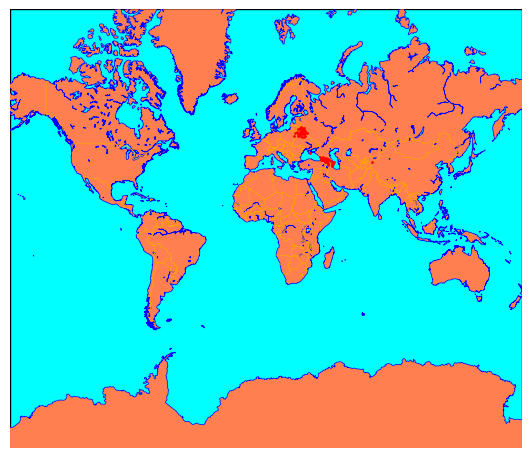

In [9]:
SLICE = 0
ZOOM = 2
projection = 'merc'
# projection = 'npstere'
map_ = draw_map(
    # map_net_1_16[SLICE][0],
    # map_net_1_16[SLICE][2],
    # map_net_1_16[SLICE][1],
    # map_net_1_16[SLICE][3],
    map_net_1_4[SLICE][0],
    map_net_1_4[SLICE][2],
    map_net_1_4[SLICE][1],
    map_net_1_4[SLICE][3],
    projection=projection,
    resolution='l',
    zoom=ZOOM,
    img_write=False,
    )

((512, 438), 1.1689497716894977)

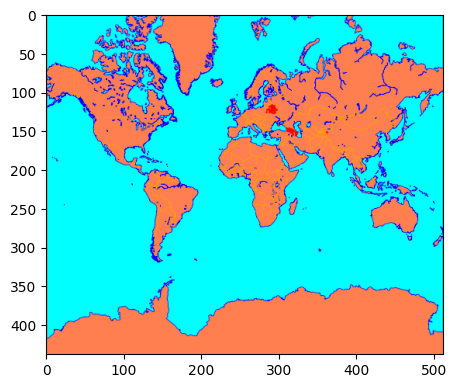

In [30]:
from PIL import Image
img = Image.open(f'./test_proj_{projection}.png')
plt.imshow(img)
img.size, img.size[0]/img.size[1]

In [31]:
x_size, y_size

(340, 162.0)

In [37]:
x_rate = img.size[0] / x_size
y_rate = img.size[1] / y_size
x_rate, y_rate

(1.5058823529411764, 2.7037037037037037)

In [19]:
actual_st.iloc[:1, :]

,name_x,sis,lat_x,lon_x,name_y,lat_y,lon_y,hos,country,lon_e,diff_lat,diff_lon
0,Симферополь,33946,45.040278,33.967222,Симферополь,44.7,34.1,181,Украина,34.1,0.340278,-0.132778


In [33]:
st_lon_lat = actual_st.iloc[0, 2:4].to_numpy()[::-1]
st_lon_lat

array([33.967222, 45.040278], dtype=object)

In [38]:
x_rate * st_lon_lat[0], y_rate * st_lon_lat[1]

(51.15064018823529, 121.77556644444445)

In [23]:
x_st, y_st = map_(*st_lat_lon, inverse=False)
x_st, y_st

(21788019.91014949, 21485762.57656388)

In [26]:
lonpt, latpt = map_(x_st,y_st, inverse=True)
lonpt, latpt

(33.96722199999999, 45.04027799999999)